In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#İris veri setini çağırıyoruz.
X, y = load_iris(return_X_y=True)

In [41]:
#Eğitim ve test verisi olarak ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [42]:
#Ölçeklendirilme işlemi
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
#Decision Tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [44]:
#Random Forest
rf = RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)

In [45]:
#Naive-Bayes
nb = GaussianNB()
nb = nb.fit(X_train, y_train)

In [46]:
#K-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train,y_train)

In [47]:
models = list()
models.append(["Decision Tree",dt])
models.append(["Random Forest",rf])
models.append(["Naive-Bayes",nb])
models.append(["K-NN",knn])

In [48]:
results = list()
scores = pd.DataFrame()

In [55]:
for model_name, model in models:
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print(model_name,"\n",cm)

    accuracy_rate = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall =recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')

    score = [model_name,accuracy_rate,precision,recall,f1]
    score = pd.DataFrame(score)
    scores = pd.concat([scores, score],axis=1,ignore_index=True)

s = pd.DataFrame(["Model","Accuracy_Rate","Precision", "Recall", "F1"])
scores = pd.concat([s,scores],axis=1,ignore_index=True)

Decision Tree 
 [[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]
Random Forest 
 [[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
Naive-Bayes 
 [[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]
K-NN 
 [[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]


In [50]:
print(scores)

               0              1              2            3         4
0          Model  Decision Tree  Random Forest  Naive-Bayes      K-NN
1  Accuracy_Rate       0.911111       0.933333     0.911111  0.911111
2      Precision       0.911111       0.933333     0.911111  0.911111
3         Recall       0.911111       0.933333     0.911111  0.911111
4             F1       0.911111       0.933333     0.911111  0.911111


<Axes: >

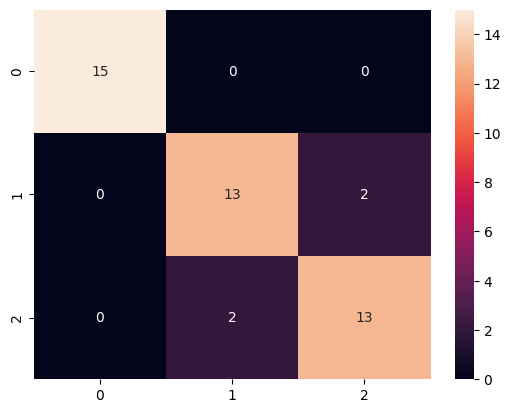

In [51]:
#Confusion matrix Decision Tree
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

<Axes: >

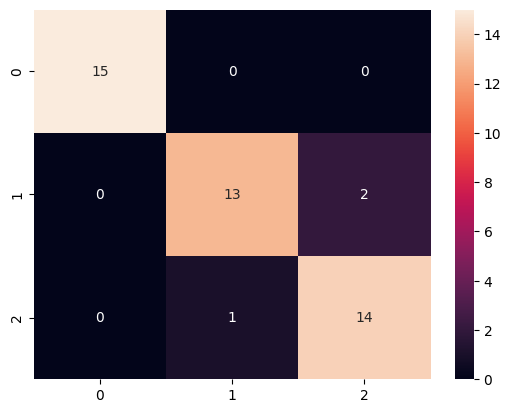

In [52]:
#Confusion matrix Random Forest
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

<Axes: >

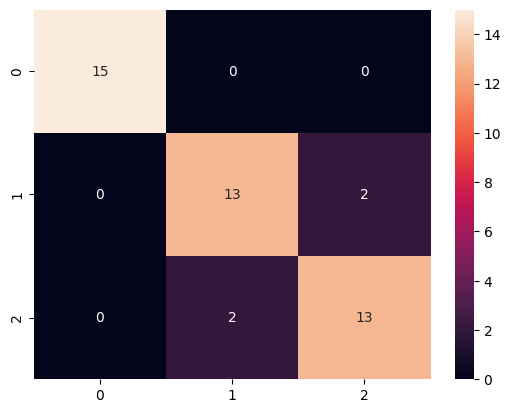

In [53]:
#Confusion matrix Naive-Bayes
y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

<Axes: >

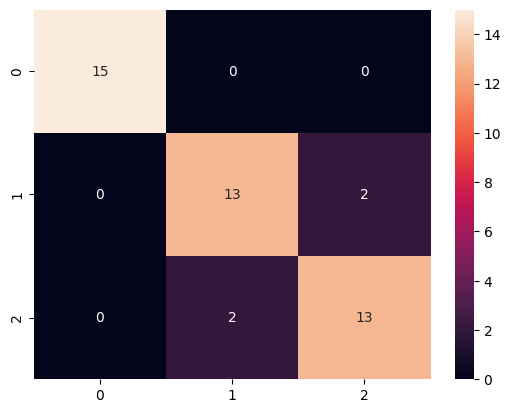

In [54]:
#Confusion matrix K-NN
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)